<h1>Midterm Project Milestone 3 - Baran Bayden</h1>
In this project, we will try to determine the most liked movie recently. Our Central Question is "What is the recent most liked movie?". For this, we will take certain data from 3 different datasets and combine these data to reach the answer to our question. We got these datasets from Kaggle platform.

**Group Members:** Baran Bayden, Ritika Shrestha


In [1]:
import os
import os.path
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 

#importing csv library to read csv files
import csv          

datadir= 'data'

<h3>First Dataset</h3>

First Dataset is "Top 100 Popular Movies from 2003 to 2022 (iMDB)", as the name suggests, contains a total of 2000 movies, including the 100 most popular movies from 2003 to 2022 according to iMDB data. The this dataset published on Kaggle and publisher is George Scutelnicu. The publisher said it collected this data by web scraping from iMBD.

Dataset URL: https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb

The format of the dataset is **csv**.
The dataset contains 2000 movies, ie 2000 rows.

However, it contains 13 features, namely columns.

The names, descriptions, number of data and datatypes of these columns are as follows:

| Column Names  | Description | Number of Value | Datatype |
| ------------- | ------------- | ------------- |-------------
| Title | Film Name  | 2000 Valid Value | object |
| Rating  | Film rating according to iMDB users, out of 10  | 1998 value, 2 missing | float64|
| Year | The year the film was released | 2000 valid value | int64 |
| Month | The month the film was released | 2000 valid value | object |
| Certificate | Film Certification | 1966 valid value, 34 missing | object |
| Runtime | Lenght of the film in minutes | 2000 valid value | object |
| Directors | The person/s who directed the film | 2000 valid value | object | 
| Stars | Actors playing in the film | 2000 valid value | object |
| Genre/s | The genre/s of the film | 2000 valid value | object | 
| Filming Location | The place where the film was shot | 2000 valid value | object |
| Budget | The money spent on making the film | 2000 valid value | object |
| Income | The money earned by the fim | 2000 valid value | object |
| Country_of_origin | Countries that produced the film | 2000 valid value | object|


The reason we use this dataset is because we want to take iMDB Rating information and evaluate popular movies according to this data. Other features that make this dataset interesting include data such as movie genre, origin, director, and we can use this data in our popularity research by using things like majority calculation method.

### Tidying data
Tidying part creates a copy of a dataset named Data1 and stores it in a new variable called Tidy_Data1. Deletes unnecessary columns from Tidy_Data1. Removes empty rows from Tidy_Data1. Renames the column name 'Title' to 'Movies' and drops duplicates based on the 'Movies' column. Sorts the data in Tidy_Data1 based on the 'Rating' column in descending order. Converts the 'Year' column into an integer data type. Converts the 'Rating' column into a float data type. Displays a sample of the resulting cleaned dataset.


In [2]:
def ConvertToDOL(fileName):
    
    # Declaring dictnary
    DOL={}
    
    with open(fileName) as file_obj:

        # Reading the first line as headers/column names
        headers= file_obj.readline().strip().split(',')
        
        # Declaring headers/column as key in dictnary
        for key in headers:
            DOL[key]=[]

        # Reading file object
        data_list= csv.reader(file_obj)

        for line in data_list:

            for key,each_val in zip(headers,line):

                if  key in ['Rating','Runtime','Budget','Income'] and each_val != '' and each_val != 'Unknown':
                    
                    # Striping unique symbols for currency and replacing commas
                    each_val=each_val.strip('$%<>€£¥₩₹"?CASEK\\DKK\\xaNOK\\xa').replace(',','')

                    # Converting string numbers into float
                    each_val=float(each_val)
        
                DOL[key].append(each_val)

    return DOL,headers

# Calling function to convert csv file into DOL 
filePath=os.path.join(datadir,'movies.csv')
data,col=ConvertToDOL(filePath)

# Converting DOL data into DataFrame
Data1= pd.DataFrame(data,columns=col)

# Making an copy to store tidy data
Tidy_Data1= Data1.copy()

# Tidy_Data1.dropna(inplace=True)

# Deleting column which are not needed for analysis
del Tidy_Data1['Income'],Tidy_Data1['Budget'],Tidy_Data1['Filming_location'],Tidy_Data1['Runtime']
del Tidy_Data1['Stars'],Tidy_Data1['Country_of_origin'],#Tidy_Data1['Genre']
del Tidy_Data1['Directors']

# Removing empty rows
for each_col in list(Tidy_Data1.columns):
    Tidy_Data1=Tidy_Data1[Tidy_Data1[each_col] != '']

# Renaming the column name Title as Movies
Tidy_Data1=Tidy_Data1.rename(columns={'﻿Title':'Movies'}).drop_duplicates('Movies')#.set_index('Movies')

# Sorting by highest ratings
Tidy_Data1.sort_values('Rating', ascending=False, inplace=True)

# Converting year into integer
Tidy_Data1['Year']= Tidy_Data1['Year'].apply(lambda val : int(val))

# Converting into number
Tidy_Data1['Year']= Tidy_Data1['Year'].apply(lambda val : int(val))
Tidy_Data1['Rating']= Tidy_Data1['Rating'].apply(lambda val : float(val))

# Display a sample of the DataFrame
Tidy_Data1.head(5)

# # number of unique values in 'Movies
# Tidy_Data1.agg({'Movies':['nunique','size','count']})


,Movies,Rating,Year,Month,Certificate,Genre
1401,The Dark Knight,9.0,2008,July,PG-13,"Action, Crime, Drama"
1903,The Lord of the Rings: The Return of the King,9.0,2003,December,PG-13,"Action, Adventure, Drama"
1200,Inception,8.8,2010,July,PG-13,"Action, Adventure, Sci-Fi"
800,Interstellar,8.6,2014,November,PG-13,"Adventure, Drama, Sci-Fi"
803,Whiplash,8.5,2014,October,R,"Drama, Music"


<h3>Second Dataset:</h3>
The second dataset "9000+-Movies-Dataset-Analysis" is created using TMDB resources and contains information on movies as well as popularity information. Dataset is published on Kaggle and published by Shaimaa Elbadrawy. The publisher stated that he obtained this dataset using the TMDB API.

The dataset contains the data of 9828 movies, that is, there are 9828 rows.

However, the dataset contains 13 different properties, that is, there are 13 columns. 

Dataset URL: https://www.kaggle.com/code/xshaimaa/9000-movies-dataset-analysis/data?select=mymoviedb.csv

The names, descriptions, number of data and datatypes of these columns are as follows:

| Column Names | Description | Number of Value | Datatype |
| ------------- | ------------- | -------------| ------------- |
| Release_Date | Date when the movie was released. | 9827 Valid Value | object |
| Title | Name of the movie | 9828 Valid Value | object |
| Overview | Brief summary of the movie. | 9828 Valid Value | object |
| Popularity | It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.| 9827 Valid Value | object| 
| Vote_Count | Total votes received from the viewers | 9826 Valid Value | float64 |
| Vote_Average | Average rating based on vote count and the number of viewers out of 10 | 9826 Valid Value | int64 |
| Original_Language | Original language of the movies. Dubbed version is not considered to be original language. | 9827 Valid Value | float64 |
| Genre | Categories the movie it can be classified as. | 9826 Valid Value | object | 
| Poster_Url | Url of the movie poster. | 9826 Valid Value | object |

We use this dataset to derive the popularity of movies from the popularity column. We wanted to use this dataset because we were interested in the abundance of data in the dataset and the fact that it is user-oriented, and popularity data is calculated by user actions.

We ran into some problems with this dataset. When converting to DoL, it tried to split the '$200,000' values, it also gave an error in currencies. Therefore, we used the csv library to read the data in the list and converted the currency signs to float currency.

### Data Tidying

Data tidying part is preparing and cleaning the data in the DataFrame Data2 and storing the cleaned data in a new DataFrame called Tidy_Data2.

The code first creates a copy of Data2. Then, any rows with missing values are removed using the dropna method. Next, several columns that are not needed for the analysis are deleted using the del statement. The column 'Title' is renamed to 'Movies', and any duplicate rows based on the 'Movies' column are removed using the drop_duplicates method.

The popularity column is converted to a float using a lambda function and the apply method. The DataFrame is then sorted by the popularity column in descending order using the sort_values method.

Finally, a sample of the cleaned DataFrame is displayed using the head method, which shows the top 10 rows.



In [3]:
def ConvertToLOL(fileName):

    LOL=[]

    with open(fileName) as file_obj:

        # Reading the second line for the headers
        headers= file_obj.readline().strip().split(',')

        # Reading file object
        data_list= csv.reader(file_obj)

        # Iterating through list of list of lines
        for line in data_list:

            # Appending each list of line
            LOL.append(line)
        
    return LOL,headers

# Calling function to convert csv file into LOL 
filePath=os.path.join(datadir,'mymoviedb.csv')
data,col=ConvertToLOL(filePath)

# Converting LOL data into DataFrame
Data2= pd.DataFrame(data, columns=col)

# Making an copy 
Tidy_Data2= Data2.copy()

# Dropping rows with NaN values
Tidy_Data2.dropna(inplace=True)

# Deleting column 
del Tidy_Data2['Poster_Url'],Tidy_Data2['Original_Language'],Tidy_Data2['Overview']
del Tidy_Data2['Release_Date'], Tidy_Data2['Vote_Average'], Tidy_Data2['Vote_Count'],Tidy_Data2['Genre']

# Renaming the column 
# and droping rows with duplicate values 
Tidy_Data2=Tidy_Data2.rename(columns={'Title':'Movies'}).drop_duplicates('Movies')

# Converting popularity into float
Tidy_Data2['Popularity']= Tidy_Data2['Popularity'].apply(lambda val : float(val))

# Sorting by highest popularity
Tidy_Data2.sort_values('Popularity',ascending=False,inplace=True)

# Display a sample of the DataFrame
Tidy_Data2.head(10)


,Movies,Popularity
0,Spider-Man: No Way Home,5083.954
1,The Batman,3827.658
2,No Exit,2618.087
3,Encanto,2402.201
4,The King's Man,1895.511
5,The Commando,1750.484
6,Scream,1675.161
7,Kimi,1601.782
8,Fistful of Vengeance,1594.013
9,Eternals,1537.406


<h3>Third Dataset:</h3>

The third dataset, "Highest Grossing Movies of 2022 (till September)", contains the top 100 highest-grossing movies from early 2022 to 20 September 2022. We chose to use this dataset because we can get the grossing amount of each movie from here.

This dataset contains 1000 movies, that is, it contains 1000 rows.

However, the dataset contains 7 different properties, that is, there are 7 columns.

Dataset URL: https://www.kaggle.com/code/fethullahceviz/top-1000-movies-data-analysis/data

The names, descriptions, number of data and datatypes of these columns are as follows:

| Column Names | Description | Number of Value | Datatype |
| ------------- | ------------- | ------------- | ------------- |
| Movie Title | The name of the movie. | 989 Unique Value, 11 Same value | string |
| Year of Release | The year the movie was released. | 1000 Value, 55 Unique Value, Most Common Value 2017 | integer | 
| Genre | Categories where the movie belongs. | 1000 Value, 153 Unique Value | string | 
| Movie Rating | Ratings given by IMDb registered users (on a scale of 1 to 10) | 1000 Value, Mean Value 6.8 | float |
| Duration | Movie running time in minutes. | 1000 Value, Mean Value 118 | integer |
| Gross | Gross earnings in U.S. dollars. | 1000 Value, 949 Unique Value | string |
| Worldwide LT Gross | Worldwide Lifetime Gross (International + Domestic totals.) | 1000 Unique Value | string |
| Metascore | Weighted average of many reviews coming from reputed critics (on a scale of 0 to 100) | 1000 Value, 80 Unique Value | integer |
| Votes | Number of votes cast by IMDb registered users. | 1000 Value, Mean Value 339k | integer |
| Logline | A one or two sentence summary of the film. | 1000 Unique Value | string |




We will use the Worlwide(USD) and Foreign(USD) columns from this dataset because these datasets represent the grossing amounts in 2022. Thanks to this data, we will be able to evaluate the decisions of the viewers who pay and watch the movie as well as users on a certain platform such as iMDB and TMDB.

### Data Tidying

Data tidying part is preparing the third dataset (Data3) for analysis. It makes a copy of the dataset and filters out the columns that are not needed for the analysis. It then removes rows with NaN values and renames the columns to make them more descriptive. It also converts the worldwide gross column from a string to a float by removing the '$' sign and commas, and sorting the dataset by the highest gross amount. Finally, it displays a sample of the cleaned DataFrame.

In [4]:
# File Path to the csv file
filePath= os.path.join(datadir,'Top_1000_Highest_Grossing_Movies_Of_All_Time.csv')

with open(filePath) as file_obj:

    # Converting csv file directly to DataFrame
    Data3= pd.read_csv(file_obj)

# Making an copy to store tidy data
Tidy_Data3= Data3.copy()

# flitering only the columns needed for analysis
Tidy_Data3=Tidy_Data3[['Movie Title','Worldwide LT Gross']] 

# # Removing NaN rows
for each_col in list(Tidy_Data3.columns):
    Tidy_Data3=Tidy_Data3[Tidy_Data3[each_col] != '******']

# Renaming the column names
Tidy_Data3=Tidy_Data3.rename(columns={'Movie Title':'Movies',
        # 'Gross': 'Domestic Gross($)',
        'Worldwide LT Gross': 'Worldwide Gross($)'}
        ).drop_duplicates(subset='Movies'
        )#.set_index('Movies')

Tidy_Data3['Worldwide Gross($)']=Tidy_Data3['Worldwide Gross($)'].apply(lambda val : float(val.strip('$').replace(',','')))
# Tidy_Data3['Domestic Gross($)']=Tidy_Data3['Domestic Gross($)'].apply(lambda val : float(val.strip('$').replace(',','')))


# Display a sample of the DataFrame
Tidy_Data3.head(60)


,Movies,Worldwide Gross($)
0,Avatar,2.847397e+09
1,Avengers: Endgame,2.797501e+09
2,Titanic,2.201647e+09
3,Star Wars: Episode VII - The Force Awakens,2.069522e+09
4,Avengers: Infinity War,2.048360e+09
5,Spider-Man: No Way Home,1.911433e+09
6,Jurassic World,1.671537e+09
7,The Lion King,1.663250e+09
8,The Avengers,1.518816e+09
9,Fast & Furious 7,1.515341e+09


----
### Merging Datasets
It merges three datasets Tidy_Data1, Tidy_Data2, and Tidy_Data3 on the common column Movies using the pd.merge() method. The how='inner' parameter specifies that only the rows with matching values in both datasets will be kept in the merged dataset. The resulting merged dataset is stored in a new DataFrame Joined_Data1.

It then merges Joined_Data1 with Tidy_Data3 on the common column Movies using the same method and parameter, and stores the resulting merged dataset in a new DataFrame Joined_Data.

It filters the rows of Joined_Data to include only the rows where the value in the Year column is greater than or equal to 2010.

It sets the index of Joined_Data to the Movies column using the set_index() method, with the inplace=True parameter to modify the DataFrame in place.

Finally, it displays a sample of the first 6 rows of the resulting DataFrame using the head() method.

In [5]:
# Merging three datasets
Joined_Data1= pd.merge(Tidy_Data1,Tidy_Data2,on=['Movies'],how='inner')
Joined_Data=pd.merge(Joined_Data1,Tidy_Data3,on='Movies',how='inner')

# Filtering rows
Joined_Data=Joined_Data[Joined_Data['Year'] >= 2010]

Joined_Data.set_index(['Movies'],inplace=True)

# Display a sample of the DataFrame
Joined_Data.head(6)

,Rating,Year,Month,Certificate,Genre,Popularity,Worldwide Gross($)
Movies,,,,,,,
Inception,8.8,2010,July,PG-13,"Action, Adventure, Sci-Fi",127.131,8.368481e+08
Interstellar,8.6,2014,November,PG-13,"Adventure, Drama, Sci-Fi",110.531,7.017292e+08
The Intouchables,8.5,2011,November,R,"Biography, Comedy, Drama",87.807,4.265885e+08
Avengers: Endgame,8.4,2019,April,PG-13,"Action, Adventure, Drama",205.308,2.797501e+09
The Dark Knight Rises,8.4,2012,July,PG-13,"Action, Drama",179.587,1.081153e+09
Top Gun: Maverick,8.4,2022,May,PG-13,"Action, Drama",44.584,1.440740e+09


----
### Data Processing 

This code performs data processing and analysis on a movie dataset.

First, three datasets (Tidy_Data1, Tidy_Data2, and Tidy_Data3) are merged using pandas merge function. Then, the rows with the year less than 2010 are removed from the joined dataset using filtering.

Next, the factors (rating, popularity, and worldwide gross) are normalized by dividing them by their maximum values. Then, weights are assigned to each factor to calculate a weighted average for each movie. The movies are then sorted in descending order based on their weighted average to find the top 10 best movies after 2010.

The code then creates a horizontal bar chart to display the top 10 best movies.

The code also answers the question of which movie genre was most popular in November. The joined dataset is grouped by month and genre, and the maximum popularity of each genre in each month is calculated. The code then selects the month of November and finds the genre with the highest popularity in November.

Finally, a horizontal bar chart is created to display the top 10 popular genres.

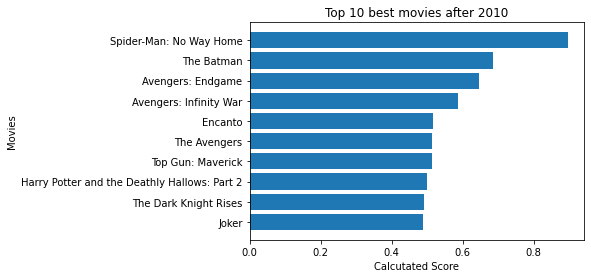

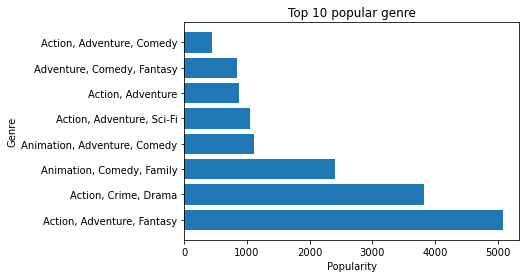

In [6]:

#Data processing 
# Normalizing the factors
max_rating= Joined_Data['Rating'].max()
normalized_rating= Joined_Data['Rating'].apply(lambda val : val/max_rating)

max_popularity= Joined_Data['Popularity'].max()
normalized_popularity= Joined_Data['Popularity'].apply(lambda val : val/max_popularity)

max_Worldwide_Gross= Joined_Data['Worldwide Gross($)'].max()
normalized_Worldwide_Gross= Joined_Data['Worldwide Gross($)'].apply(lambda val : val/max_Worldwide_Gross)


# Assigning weight to each factors
rating_weight, popularity_weight, worldwide_gross_weight= 0.4, 0.35, 0.25

# Calculating weighted average
Joined_Data['Weighted Avg']=(normalized_rating*rating_weight) + \
                            (normalized_popularity*popularity_weight) + \
                            (normalized_Worldwide_Gross*worldwide_gross_weight)

# Sorting by highest Weighted Averages (top best movies)
Joined_Data.sort_values('Weighted Avg',ascending=False,inplace=True)

# Display a sample of the DataFrame
top_10_best_movies= Joined_Data.nlargest(10,'Weighted Avg').reset_index()
top_10_best_movies



top_10_best_movies.sort_values('Weighted Avg',ascending=True,inplace=True)

# Plotting a horizontal bar chart
plt.barh(top_10_best_movies['Movies'],top_10_best_movies['Weighted Avg'])

# setting label of y-axis
plt.ylabel("Movies")
 
# setting label of x-axis
plt.xlabel("Calcutated Score")

plt.title("Top 10 best movies after 2010")
plt.show()

#So according to the analysis, `Spider-Man: No Way Home` was the top movie after 2010, excluding the most recent movies in 2022.


#Which movies genre was most popular in November?

#To answer our another question, we grouped the merged data by Month and Genre and calculated the maximum popularity of each genre in each month.


grouped_by_month= Joined_Data.groupby(['Month','Genre']).agg({'Popularity':'max'})

# Getting max popularity of specific month
grouped_by_month.loc[["November"]].nlargest(1,'Popularity')



# Top popular genre
grouped_by_largest=grouped_by_month.reset_index(inplace=False)
grouped_by_largest=grouped_by_largest.nlargest(10,'Popularity')

# Plotting a horizontal bar chart
plt.barh(grouped_by_largest['Genre'],grouped_by_largest['Popularity'])
# plt.bar_label(p, )

# setting label of y-axis
plt.ylabel("Genre")
 
# setting label of x-axis
plt.xlabel("Popularity")

plt.title("Top 10 popular genre")
plt.show()